Plot various loss functins for binary classification, cf. MLaPP Fig. 6.7

Consider binary classification, in which $y \in \{-1, +1\} \hspace{300pt}$

let $\eta \equiv w^{T} x$, where $w$ is the coefficient and $x$ the feature vector. For a perceptron-type or SVM-like algorithms, we want $\eta=w^{T} x$ to be a large positive number when we are centain that $y=+1$, and want $\eta=w^{T}x$ to be a large negative number when we are certain that $y=-1$. Based on this intuition, we can define the following loss functions

1. $0-1 \text{loss}$:

    When y is +1 (-1) and $\eta$ is positive (negative), there is no penalty. But when y is +1 (-1) and $\eta$ is negative (positive), add an unity penalty. Therefore, the loss function can be written as 
    
    \begin{equation} 
    L_{0-1} = \mathbb{I}(y\eta < 0) \hspace{300pt}
    \end{equation}
    
2. negative-log-likelihood (nll):
   
   with $P(y|x, w) = Ber(y | sigm(w^{T}x)) = \dfrac{1}{1+e^{-yw^{T}x}}$, the nll loss function can be written as 
   
   \begin{equation}
   L_{nll} = \log(1+e^{-y \eta}) \hspace{300pt}
   \end{equation}
   
3. Hinge loss:
    
   This loss function has similar penalty as nll when the $\eta$ deviates significantly from the true $y$, and penalizes not as much as nll would when $\eta$ is closer to and smaller than 1 (meaning that we are a little uncertain about the decision).
   
   \begin{equation}
   L_{hinge} = \max(0, 1-y\eta) \hspace{300pt}
   \end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [54]:
def loss_01(values):
    return (values < 0).astype(int)

def loss_nll(values):
    return np.log2(1+np.exp(-values))

def loss_hinge(values):
    return np.maximum(0, 1-values)


In [45]:
def adjustAxeProperties(ax_obj, x_fontsize, x_rotation, y_fontsize, y_rotation):
    for tick in ax_obj.xaxis.get_major_ticks():
        tick.label.set_fontsize(x_fontsize)
        tick.label.set_rotation(x_rotation)
    for tick in ax_obj.yaxis.get_major_ticks():
        tick.label.set_fontsize(y_fontsize)
        tick.label.set_rotation(y_rotation)
        

In [55]:
X_MIN = -2.1
X_MAX = 2.1
y_eta_values = np.linspace(X_MIN, X_MAX, 200)

loss_01_values = loss_01(y_eta_values)
loss_nll_values = loss_nll(y_eta_values)
loss_hinge_values = loss_hinge(y_eta_values)


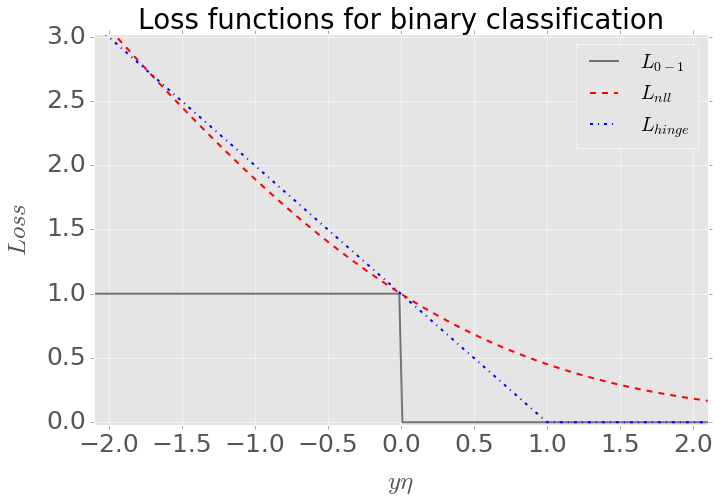

In [66]:
FONTSIZE = 25
fig, ax = plt.subplots(1, figsize=(11, 7))
p_loss_01, = ax.plot(y_eta_values, loss_01_values, color='k', linestyle='-', linewidth=2, label=r'$L_{0-1}$', alpha=0.5)
p_loss_nll, = ax.plot(y_eta_values, loss_nll_values, color='r', linestyle='--', linewidth=2, label=r'$L_{nll}$')
p_loss_hinge, = ax.plot(y_eta_values, loss_hinge_values, color='b', linestyle='-.', linewidth=2, label=r'$L_{hinge}$')

ax.set_xlabel(r'$y\eta$', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel(r'$Loss$', fontsize=FONTSIZE, labelpad=15)
adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
ax.set_xticks(np.arange(-2.0, 2.1, 0.5))
ax.set_yticks(np.arange(0, 3.02, 0.5))
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(-0.02, 3.02)

ax.legend(loc='best', fontsize=FONTSIZE*0.8)
ttl = ax.set_title('Loss functions for binary classification', fontsize=1.1*FONTSIZE)
